# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 100%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">Mental Health Status Prediction</p>

<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #4B0082; background-color: #D8BFD8; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em; color: #4B0082;">
        <strong>Objective:</strong><br>
        This notebook aims to conduct exploratory data analysis (EDA) on mental health data to reveal insights and trends related to mental health status. We will investigate key factors such as academic pressure, work-life balance, and personal history, utilizing data visualization techniques to effectively communicate our findings. The primary goal is to enhance understanding and support data-driven decision-making in predicting mental health status as a binary classification.<br><br>
</div>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 100%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🔍 Data Wonderland: What Are We Working With?</p>

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [3]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,140700.0,70349.500000,40616.735775,0.00,35174.75,70349.50,105524.25,140699.0
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,140700.0,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


In [5]:
print(train.info())
print("-"*50)
print(train.isnull().sum())
print("-"*50)
print("Duplicated Rows in Train Data:",train.duplicated().sum())
print("-"*50)
print("Number of Rows in Data:",train.shape[0])
print("-"*50)
print("Number of Column in Data:",train.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
numerical_column_names =train.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


In [7]:
object_column_names = train.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [8]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [9]:
train.nunique()

Name                                     422
Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 100%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">📊 Exploratory Data Adventure!</p>

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">😞 Depression Rates</p>

In [10]:
depression_counts = train['Depression'].value_counts()

In [11]:
fig = px.pie(
    values=depression_counts.values,
    names=depression_counts.index,
    title='Target Distribution',
    color=depression_counts.index,
    color_discrete_sequence=['#8B4513', '#2E8B57']    
)

fig.update_layout(
    height=500,  
    width=700   
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🎭 Gender Breakdown</p>

In [12]:
gender_value = train['Gender'].value_counts()

In [13]:
fig = px.pie(
    values=gender_value.values,
    names=gender_value.index,
    title='Gender Distribution',
    color=gender_value.index,
    color_discrete_sequence=['#8B4513', '#2E8B57']    
)

fig.update_layout(
    height=500,  
    width=700   
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🤔 Suicidal Thoughts</p>

In [14]:
sucide_counts = train['Have you ever had suicidal thoughts ?'].value_counts()

In [15]:
fig = px.pie(
    values=sucide_counts.values,
    names=sucide_counts.index,
    title='Sucide Thoughts Distribution',
    color=sucide_counts.index,
    color_discrete_sequence=['#8B4513', '#2E8B57']    
)

fig.update_layout(
    height=500,  
    width=700   
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🧑‍🎓 Professional Overview</p>

In [16]:
working_value = train['Working Professional or Student'].value_counts()

In [17]:
fig = px.pie(
    values=working_value.values,
    names=working_value.index,
    title='Professional or Student Distribution',
    color=gender_value.index,
    color_discrete_sequence=['#8B4513', '#2E8B57']    
)

fig.update_layout(
    height=500,  
    width=700   
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🏠 Family History of Mental Illness</p>

In [18]:
mental_illness_counts = train['Family History of Mental Illness'].value_counts()

In [19]:
fig = px.pie(
    values=mental_illness_counts.values,
    names=mental_illness_counts.index,
    title='Family History Mental Illness',
    color=mental_illness_counts.index,
    color_discrete_sequence=['#8B4513', '#2E8B57']    
)

fig.update_layout(
    height=500,  
    width=700   
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🏙️ City Insights</p>

In [20]:
city_value = train['City'].value_counts().head(20)

In [21]:
fig = px.bar(
    x=city_value.index,
    y=city_value.values,
    title='Top 20 Cities Distribution',
    labels={'x': 'City', 'y': 'Count'},
    color=city_value.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel
 )

fig.update_layout(
    height=500, 
    width=750    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);"> 🧑‍🎓 Professional Overview</p>

In [22]:
profession_value = train['Profession'].value_counts().head(20)

In [23]:
fig = px.bar(
    x=profession_value.index,
    y=profession_value.values,
    title='Top 20 Professions Distribution',
    labels={'x': 'Profession', 'y': 'Count'},
    color=profession_value.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

fig.update_layout(
    height=500, 
    width=750    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">📚 Academic Pressure</p>

In [24]:
academic_value = train['Academic Pressure'].value_counts()

In [25]:
fig = px.bar(
    x=academic_value.index,
    y=academic_value.values,
    title='Academic Pressure Distribution',
    labels={'x': 'Academic Pressure Level', 'y': 'Count'},
    color=academic_value.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel  
)

fig.update_layout(
    height=500, 
    width=500    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">😩 Work Pressure</p>

In [26]:
work_count = train['Work Pressure'].value_counts()

In [27]:
fig = px.bar(
    x=work_count.index,
    y=work_count.values,
    title='Work Pressure Distribution',
    labels={'x': 'Work Pressure Level', 'y': 'Count'},
    color=work_count.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    height=500, 
    width=500    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">📈 CGPA Distribution</p>

In [28]:
cgpa_count = train['CGPA'].value_counts()

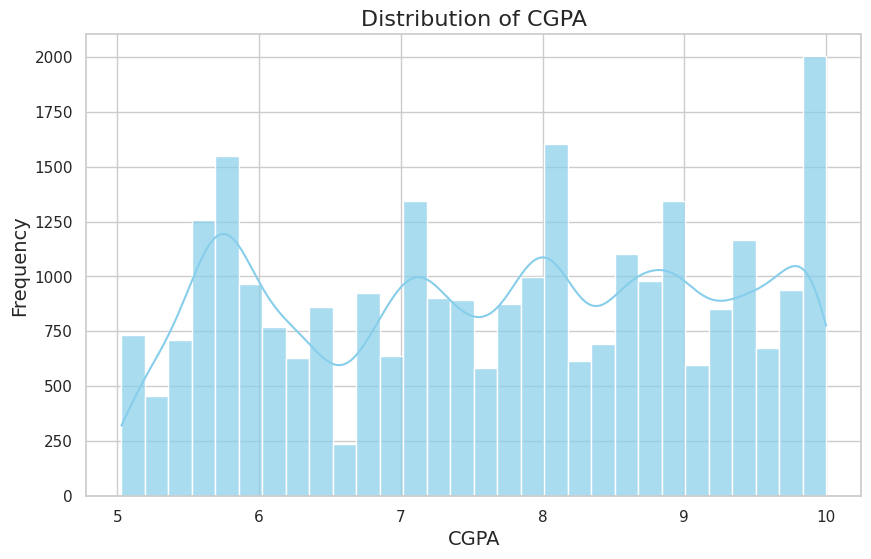

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(train['CGPA'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of CGPA', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">😊 Study Satisfaction</p>

In [30]:
study_counts = train['Study Satisfaction'].value_counts()

In [31]:
fig = px.bar(
    x=study_counts.index,
    y=study_counts.values,
    title='Study Satisfaction Distribution',
    labels={'x': 'Study Satisfaction Level', 'y': 'Count'},
    color=study_counts.index, 
    color_discrete_sequence=px.colors.qualitative.Pastel  
)

fig.update_layout(
    height=500, 
    width=500    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🥗 Dietary Habits</p>

In [32]:
Dietary_counts = train['Dietary Habits'].value_counts()
Dietary_counts 

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [33]:
train['Dietary Habits'] = train['Dietary Habits'].replace('More Healthy', 'Healthy')
train['Dietary Habits'] = train['Dietary Habits'].replace('Yes', 'Healthy')
train['Dietary Habits'] = train['Dietary Habits'].replace('No', 'Unhealthy')
train['Dietary Habits'] = train['Dietary Habits'].replace('No Healthy', 'Unhealthy')
train['Dietary Habits'] = train['Dietary Habits'].replace('Less Healthy', 'Moderate')
train['Dietary Habits'] = train['Dietary Habits'].replace('Less than Healthy', 'Unhealthy')
train['Dietary Habits'] = train['Dietary Habits'].replace('Hormonal', 'Moderate')

In [34]:
values_to_replace = [
    'Pratham', 'BSc', 'Gender', '3', 'Mihir', '1.0', 
    'Electrician', 'M.Tech', 'Vegas', 'Male', 
    'Indoor', 'Class 12', '2'
]
train.replace(values_to_replace, 'Unknown', inplace=True)

In [35]:
Dietary_count = train['Dietary Habits'].value_counts()

In [36]:
fig = px.bar(
    x=Dietary_count.index,
    y=Dietary_count.values,
    title='Dietary Habits Distribution',
    labels={'x': 'Dietary Habit', 'y': 'Count'},
    color=Dietary_count.index,
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

fig.update_layout(
    height=500, 
    width=650    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">📅 Age Analysis</p>

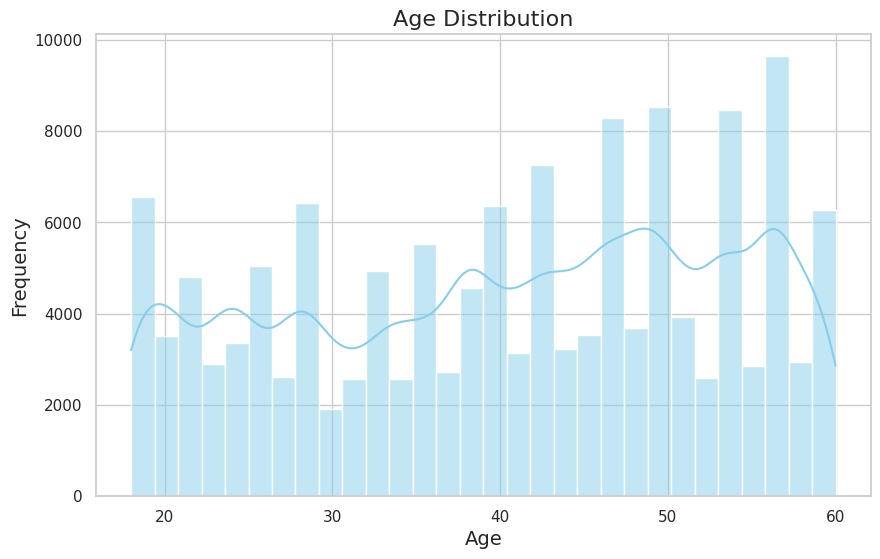

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🛌 Sleep Duration</p>

In [38]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [39]:
def group_sleep_duration(duration):
    if "hours" not in duration:
        return "Less than 3 hours" 
    if "Less than" in duration or duration in ['1-2 hours', '1-3 hours', '2-3 hours']:
        return "Less than 3 hours"
    elif "3-4 hours" in duration or "4-5 hours" in duration or "5-6 hours" in duration:
        return "3-5 hours"
    elif "6-7 hours" in duration or "7-8 hours" in duration or "5-7 hours" in duration or "6-8 hours" in duration:
        return "5-7 hours"
    elif "8-9 hours" in duration or "9-10 hours" in duration or "7-9 hours" in duration:
        return "7-9 hours"
    else:
        return "More than 9 hours"

In [40]:
train['duration'] = train['Sleep Duration'].apply(group_sleep_duration)
duration_counts = train['duration'].value_counts().sort_index()

In [41]:
fig = px.bar(
    x=duration_counts.index,
    y=duration_counts.values,
    title='Distribution of Duration',
    labels={'x': 'Duration', 'y': 'Count'},
    color=duration_counts.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

fig.update_layout(
    height=500, 
    width=750    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">⏰ Work/Study Hours</p>

In [42]:
hours_count = train['Work/Study Hours'].value_counts().sort_index()

In [43]:
fig = px.bar(
    x=hours_count.index,
    y=hours_count.values,
    title='Distribution of Work/Study Hours',
    labels={'x': 'Work/Study Hours', 'y': 'Count'},
    color=hours_count.index, 
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

fig.update_layout(
    height=500, 
    width=750    
)

fig.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">😃 Job Satisfaction</p>

In [44]:
job_count = train['Job Satisfaction'].value_counts()

In [45]:
fig_job = px.bar(
    x=job_count.index,
    y=job_count.values,
    title='Job Satisfaction Distribution',
    labels={'x': 'Job Satisfaction Level', 'y': 'Count'},
    color=job_count.index, 
    color_discrete_sequence=px.colors.qualitative.Pastel  
)

fig_job.update_layout(
    height=500, 
    width=500    
)

fig_job.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">💸 Financial Stress</p>

In [46]:
financial_count = train['Financial Stress'].value_counts()

In [47]:
fig_job = px.bar(
    x=financial_count.index,
    y=financial_count.values,
    title='Financial Stress Distribution',
    labels={'x': 'Job Satisfaction Level', 'y': 'Count'},
    color=financial_count.index, 
    color_discrete_sequence=px.colors.qualitative.Pastel  
)

fig_job.update_layout(
    height=500, 
    width=500    
)

fig_job.show()

# <p style="background-color: #4A5568; font-family: 'Courier New', monospace; font-weight: bold; color: #E2E8F0; font-size: 80%; text-align: center; border: 1px solid #E2E8F0; border-radius: 10px; padding: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);">🎓 Degree Types</p>

In [48]:
degree_count = train['Degree'].value_counts().head(20)

In [49]:
fig = px.bar(
    x=degree_count.index,
    y=degree_count.values,
    title='Top 20 Degree Distribution',
    labels={'x': 'Degree', 'y': 'Count'},
    color=degree_count.index,  
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

fig.update_layout(
    height=500, 
    width=750    
)

fig.show()